In [46]:
'''
1 ) "uber-raw-data-janjune-15.csv" ->> this data contains all the entries/pickups from 'January' to 'June'
    Quite huge dataset having approx 15M data pts , so lets consider its sample which have approx 1M


2 ) "uber-raw-data-janjune-15_sample.csv" ->> this data is a sample of "uber-raw-data-janjune-15.csv"
    'Since above data is quite huge ~15 Million data pts , hence it is good to work with some sample
     if u do not have good specifications in your systems

'''

'\n1 ) "uber-raw-data-janjune-15.csv" ->> this data contains all the entries/pickups from \'January\' to \'June\'\n    Quite huge dataset having approx 15M data pts , so lets consider its sample which have approx 1M\n\n\n2 ) "uber-raw-data-janjune-15_sample.csv" ->> this data is a sample of "uber-raw-data-janjune-15.csv"\n    \'Since above data is quite huge ~15 Million data pts , hence it is good to work with some sample\n     if u do not have good specifications in your systems\n\n'

# 1.. Lets Read data for Analysis

In [47]:
### lets import all the necessary packages !

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
import os

In [49]:
from google.colab import files
uploaded = files.upload()

Saving Datasets-20250820T225209Z-1-001.zip to Datasets-20250820T225209Z-1-001 (1).zip


In [50]:
import zipfile
import os

with zipfile.ZipFile("Datasets-20250820T225209Z-1-001.zip", 'r') as zip_ref:
    zip_ref.extractall("uber_data")  # You can choose another name or path here

# Optional: list contents
os.listdir("uber_data")

['Datasets']

In [51]:
import os

files = os.listdir("uber_data/Datasets")
print(files)

['uber-raw-data-apr14.csv', 'uber-raw-data-janjune-15_sample.csv', 'uber-raw-data-janjune-15.csv', 'uber-raw-data-jun14.csv', 'other-Prestige_B01338.csv', 'other-Lyft_B02510.csv', 'uber-raw-data-sep14.csv', 'other-Dial7_B00887.csv', 'uber-raw-data-aug14.csv', 'other-Highclass_B01717.csv', 'Uber-Jan-Feb-FOIL.csv', 'uber-raw-data-jul14.csv', 'other-FHV-services_jan-aug-2015.csv', 'other-Carmel_B00256.csv', 'other-Federal_02216.csv', 'uber-raw-data-may14.csv', 'other-American_B01362.csv', 'other-Firstclass_B01536.csv', 'other-Diplo_B01196.csv', 'other-Skyline_B00111.csv']


In [52]:
import pandas as pd

df = pd.read_csv("uber_data/Datasets/uber-raw-data-janjune-15_sample.csv")
print(df.head())

  Dispatching_base_num          Pickup_date Affiliated_base_num  locationID
0               B02617  2015-05-02 21:43:00              B02764         237
1               B02682  2015-01-20 19:52:59              B02682         231
2               B02617  2015-03-19 20:26:00              B02617         161
3               B02764  2015-04-10 17:38:00              B02764         107
4               B02764  2015-03-23 07:03:00              B00111         140


In [53]:
uber_15 = pd.read_csv(r"uber_data/Datasets/uber-raw-data-janjune-15_sample.csv")

In [54]:
uber_15.shape

(100000, 4)

## 2.. Lets Perform Data pre-processing/Data cleaning !
        check data-type , check missing values , check whether duplicated values or not !
        ie Prepare Data for Analysis !

In [55]:
type(uber_15)

pandas.core.frame.DataFrame

In [56]:
uber_15.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [57]:
uber_15.duplicated().sum()

np.int64(54)

In [58]:
uber_15.drop_duplicates(inplace=True)

In [59]:
uber_15.duplicated().sum()

np.int64(0)

In [60]:
uber_15.shape

(99946, 4)

In [61]:
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [62]:
uber_15.isnull().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1116
locationID                 0
dtype: int64

In [63]:
uber_15['Pickup_date'][0]

'2015-05-02 21:43:00'

In [64]:
type(uber_15['Pickup_date'][0])

str

In [65]:
uber_15['Pickup_date'] = pd.to_datetime(uber_15['Pickup_date'])

In [66]:
uber_15['Pickup_date'].dtype

dtype('<M8[ns]')

In [67]:
uber_15['Pickup_date'][0]

Timestamp('2015-05-02 21:43:00')

In [68]:
type(uber_15['Pickup_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [69]:
uber_15.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

In [70]:
'''
datetime64[ns] is a general dtype, while <M8[ns] is a specific dtype , ns is basicaly nano second..
Both are similar , it entirely how your numpy was compiled..

If u want to cross check using Code :
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')



'''

"\ndatetime64[ns] is a general dtype, while <M8[ns] is a specific dtype , ns is basicaly nano second..\nBoth are similar , it entirely how your numpy was compiled..\n\nIf u want to cross check using Code :\nnp.dtype('datetime64[ns]') == np.dtype('<M8[ns]')\n\n\n\n"

In [71]:
'''
Categorical data has : Object & bool data-types
Numerical data have : Integer & Float data-type


Categorical data refers to a data type that can be stored into groups/categories/labels
Examples of categorical variables are  age group, blood type etc..


Numerical data refers to the data that is in the form of numbers,
Examples of numerical data are height, weight, age etc..

Numerical data has two categories: discrete data and continuous data


Discrete data : It basically takes countable numbers like 1, 2, 3, 4, 5, and so on.
                age of a fly : 8 , 9 day etc..

Continuous data : which is continuous in nature
                  amount of sugar , 11.2 kg  , temp of a city  , your bank balance !



'''

'\nCategorical data has : Object & bool data-types\nNumerical data have : Integer & Float data-type\n\n\nCategorical data refers to a data type that can be stored into groups/categories/labels\nExamples of categorical variables are  age group, blood type etc..\n\n\nNumerical data refers to the data that is in the form of numbers,\nExamples of numerical data are height, weight, age etc..\n\nNumerical data has two categories: discrete data and continuous data\n\n\nDiscrete data : It basically takes countable numbers like 1, 2, 3, 4, 5, and so on.\n                age of a fly : 8 , 9 day etc..\n\nContinuous data : which is continuous in nature\n                  amount of sugar , 11.2 kg  , temp of a city  , your bank balance !\n\n\n\n'

In [72]:
'''

Variations of int are : ('int64','int32','int16') in numpy library..


Int16 is a 16 bit signed integer , it means it can store both positive & negative values
int16 has has a range of  (2^15 − 1) to -2^15
int16 has a length of 16 bits (2 bytes).. ie Int16 uses 16 bits


Int32 is a 32 bit signed integer , it means it storesboth positive & negative values
int32 has has a range of (2³¹ − 1) to  -2^31
int32 has a length of 32 bits (4 bytes),, ie Int32 uses 32 bits


Int64 is a 64 bit signed integer , it means it can store both positive & negative values
int64 has has a range of  (2^63 − 1) to -2^63
int64 has a length of 64 bits (8 bytes) , ie Int64 uses 64 bits.


The only difference is that int64 has max range of storing numbers , then comes int32 , then 16 , then int8

That means that Int64’s take up twice as much memory-and doing
operations on them may be a lot slower in some machine architectures.

However, Int64’s can represent numbers much more accurately than
32 bit floats.They also allow much larger numbers to be stored..

'''


"\n\nVariations of int are : ('int64','int32','int16') in numpy library..\n\n\nInt16 is a 16 bit signed integer , it means it can store both positive & negative values\nint16 has has a range of  (2^15 − 1) to -2^15\nint16 has a length of 16 bits (2 bytes).. ie Int16 uses 16 bits\n\n\nInt32 is a 32 bit signed integer , it means it storesboth positive & negative values\nint32 has has a range of (2³¹ − 1) to  -2^31\nint32 has a length of 32 bits (4 bytes),, ie Int32 uses 32 bits\n\n\nInt64 is a 64 bit signed integer , it means it can store both positive & negative values\nint64 has has a range of  (2^63 − 1) to -2^63\nint64 has a length of 64 bits (8 bytes) , ie Int64 uses 64 bits.\n\n\nThe only difference is that int64 has max range of storing numbers , then comes int32 , then 16 , then int8\n\nThat means that Int64’s take up twice as much memory-and doing\noperations on them may be a lot slower in some machine architectures.\n\nHowever, Int64’s can represent numbers much more accurately

In [73]:
'''

Variations of unsigned integer are : ('uint64','uint32','uint16','uint8') in numpy library..
By the way , all the variations of signed integers comes sub-class numpy.unsignedinteger

uint8 is a 8 bit un-signed integer , it means it can store only positive values
Range->> Integer values from (0 to 255) ie [0 to 2^8 -1]
uint8 has a length of 8 bits (1 bytes).

uint16 is a 16 bit un-signed integer , it means it can store only positive values
Range->> Integer values from (0 to 65535) ie [0 to 2^16 -1]
uint16 has a length of 16 bits (2 bytes).


uint32 is a 32 bit un-signed integer , it means it can store only positive values
Range->> Integer values from (0 to 4294967295) ie [0 to 2^32 -1]
uint32 has a length of 32 bits (4 bytes).


uint64 is a 64 bit un-signed integer , it means it can store only positive values
Range->> Integer values from (0 to 18446744073709551615) ie [0 to 2^64 -1]
uint64 has a length of 64 bits (8 bytes).

'''

"\n\nVariations of unsigned integer are : ('uint64','uint32','uint16','uint8') in numpy library..\nBy the way , all the variations of signed integers comes sub-class numpy.unsignedinteger\n\nuint8 is a 8 bit un-signed integer , it means it can store only positive values\nRange->> Integer values from (0 to 255) ie [0 to 2^8 -1]\nuint8 has a length of 8 bits (1 bytes).\n\nuint16 is a 16 bit un-signed integer , it means it can store only positive values\nRange->> Integer values from (0 to 65535) ie [0 to 2^16 -1]\nuint16 has a length of 16 bits (2 bytes).\n\n\nuint32 is a 32 bit un-signed integer , it means it can store only positive values\nRange->> Integer values from (0 to 4294967295) ie [0 to 2^32 -1]\nuint32 has a length of 32 bits (4 bytes).\n\n\nuint64 is a 64 bit un-signed integer , it means it can store only positive values\nRange->> Integer values from (0 to 18446744073709551615) ie [0 to 2^64 -1]\nuint64 has a length of 64 bits (8 bytes).\n\n"

# 3.. Which month have max. Uber pickups in New York City ?

In [74]:
uber_15

Dispatching_base_num         Pickup_date Affiliated_base_num  locationID
0                   B02617 2015-05-02 21:43:00              B02764         237
1                   B02682 2015-01-20 19:52:59              B02682         231
2                   B02617 2015-03-19 20:26:00              B02617         161
3                   B02764 2015-04-10 17:38:00              B02764         107
4                   B02764 2015-03-23 07:03:00              B00111         140
...                    ...                 ...                 ...         ...
99995               B02764 2015-04-13 16:12:00              B02764         234
99996               B02764 2015-03-06 21:32:00              B02764          24
99997               B02598 2015-03-19 19:56:00              B02598          17
99998               B02682 2015-05-02 16:02:00              B02682          68
99999               B02764 2015-06-24 16:04:00              B02764         125

[99946 rows x 4 columns]

In [75]:
uber_15['month'] = uber_15['Pickup_date'].dt.month_name()

In [76]:
uber_15['month']

0            May
1        January
2          March
3          April
4          March
          ...   
99995      April
99996      March
99997      March
99998        May
99999       June
Name: month, Length: 99946, dtype: object

<Axes: xlabel='month'>

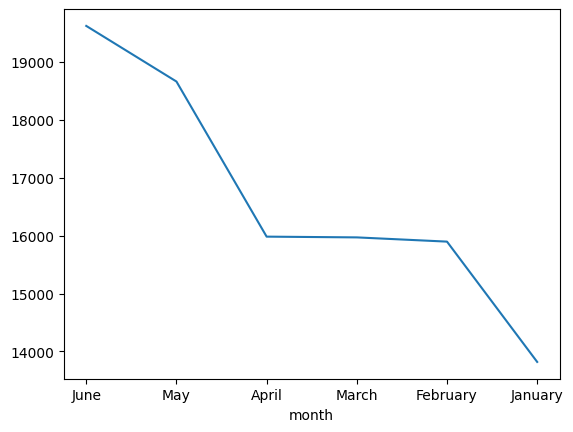

In [77]:
uber_15['month'].value_counts().plot()

<Axes: xlabel='month'>

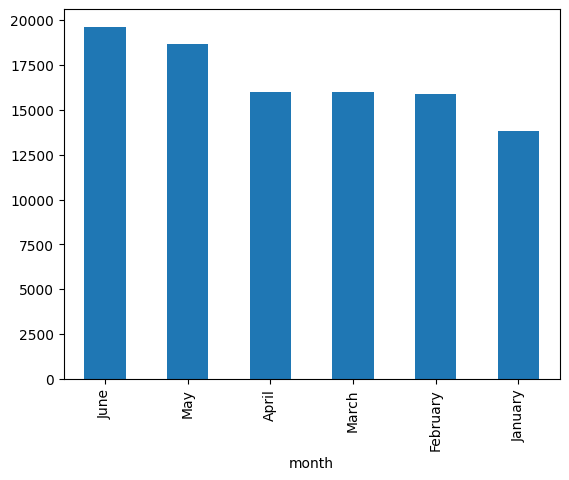

In [78]:
uber_15['month'].value_counts().plot(kind='bar')

In [79]:
'''
Inference : June seems to have max Uber Pickups

'''

'\nInference : June seems to have max Uber Pickups\n\n'

In [80]:
## extracting dervied features (weekday ,day ,hour ,month ,minute) from 'Pickup_date'..

uber_15['weekday'] = uber_15['Pickup_date'].dt.day_name()
uber_15['day'] = uber_15['Pickup_date'].dt.day
uber_15['hour'] = uber_15['Pickup_date'].dt.hour
uber_15['minute'] = uber_15['Pickup_date'].dt.minute

In [81]:
uber_15.head(4)

Dispatching_base_num         Pickup_date Affiliated_base_num  locationID  \
0               B02617 2015-05-02 21:43:00              B02764         237   
1               B02682 2015-01-20 19:52:59              B02682         231   
2               B02617 2015-03-19 20:26:00              B02617         161   
3               B02764 2015-04-10 17:38:00              B02764         107   

     month   weekday  day  hour  minute  
0      May  Saturday    2    21      43  
1  January   Tuesday   20    19      52  
2    March  Thursday   19    20      26  
3    April    Friday   10    17      38

In [82]:
## pd.crosstab() is used to create pivot table ..

pivot = pd.crosstab(index=uber_15['month'] , columns=uber_15['weekday'])

In [83]:
pivot

weekday   Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
month                                                                   
April       2365    1833      2508    2052      2823     1880       2521
February    2655    1970      2550    2183      2396     2129       2013
January     2508    1353      2745    1651      2378     1444       1740
June        2793    2848      3037    2485      2767     3187       2503
March       2465    2115      2522    2379      2093     2388       2007
May         3262    1865      3519    2944      2627     2115       2328

<Axes: xlabel='month'>

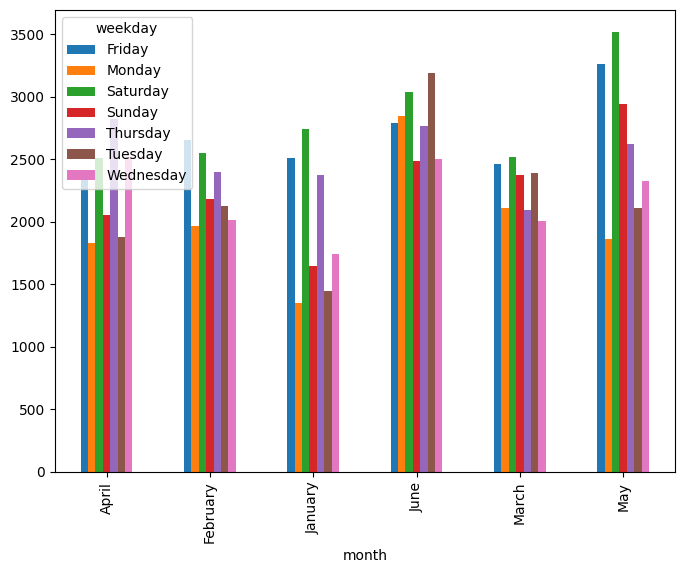

In [84]:
## grouped-bar plot using Pandas ..
pivot.plot(kind='bar' , figsize=(8,6))

In [85]:
'''

On Saturday & Friday, u are getting more Uber pickups in each month , it seems that New Yorkers used to go for
shopping , Malls , fun activities alot on these days

'''

'\n\nOn Saturday & Friday, u are getting more Uber pickups in each month , it seems that New Yorkers used to go for\nshopping , Malls , fun activities alot on these days\n\n'

# 4.. Lets Find out Hourly Rush in New york city on all days

In [86]:
summary = uber_15.groupby(['weekday' , 'hour'] , as_index=False).size()

In [87]:
summary

weekday  hour  size
0       Friday     0   581
1       Friday     1   333
2       Friday     2   197
3       Friday     3   138
4       Friday     4   161
..         ...   ...   ...
163  Wednesday    19  1044
164  Wednesday    20   897
165  Wednesday    21   949
166  Wednesday    22   900
167  Wednesday    23   669

[168 rows x 3 columns]

<Axes: xlabel='hour', ylabel='size'>

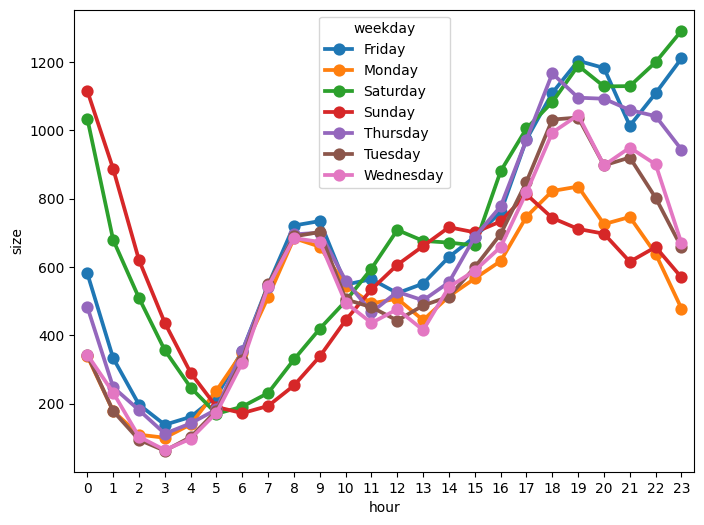

In [88]:
## pointplot between 'hour' & 'size' for all the weekdays..

plt.figure(figsize=(8,6))
sns.pointplot(x="hour" , y="size" , hue="weekday" , data=summary)

In [89]:
'''
It's interesting to see that Saturday and Sunday exhibit similar demand throughout the late night/morning/afternoon,
but it exhibits opposite trends during the evening. In the evening, Saturday pickups continue to increase throughout the evening,
but Sunday pickups takes a downward turn after evening..

We can see that there the weekdays that has the most demand during the late evening is Friday and Saturday,
which is expected, but what strikes me is that Thursday nights also exhibits very similar trends as Friday and Saturday nights.

It seems like New Yorkers are starting their 'weekends' on Thursday nights.


'''

"\nIt's interesting to see that Saturday and Sunday exhibit similar demand throughout the late night/morning/afternoon,\nbut it exhibits opposite trends during the evening. In the evening, Saturday pickups continue to increase throughout the evening,\nbut Sunday pickups takes a downward turn after evening..\n\nWe can see that there the weekdays that has the most demand during the late evening is Friday and Saturday,\nwhich is expected, but what strikes me is that Thursday nights also exhibits very similar trends as Friday and Saturday nights.\n\nIt seems like New Yorkers are starting their 'weekends' on Thursday nights.\n\n\n"

# 5.. Which Base_number has most number of Active Vehicles ??

In [90]:
uber_15.columns

Index(['Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num',
       'locationID', 'month', 'weekday', 'day', 'hour', 'minute'],
      dtype='object')

In [91]:
import os

files = os.listdir("uber_data/Datasets")
print(files)

['uber-raw-data-apr14.csv', 'uber-raw-data-janjune-15_sample.csv', 'uber-raw-data-janjune-15.csv', 'uber-raw-data-jun14.csv', 'other-Prestige_B01338.csv', 'other-Lyft_B02510.csv', 'uber-raw-data-sep14.csv', 'other-Dial7_B00887.csv', 'uber-raw-data-aug14.csv', 'other-Highclass_B01717.csv', 'Uber-Jan-Feb-FOIL.csv', 'uber-raw-data-jul14.csv', 'other-FHV-services_jan-aug-2015.csv', 'other-Carmel_B00256.csv', 'other-Federal_02216.csv', 'uber-raw-data-may14.csv', 'other-American_B01362.csv', 'other-Firstclass_B01536.csv', 'other-Diplo_B01196.csv', 'other-Skyline_B00111.csv']


In [92]:
files = os.listdir("uber_data/Datasets")
print(files)

['uber-raw-data-apr14.csv', 'uber-raw-data-janjune-15_sample.csv', 'uber-raw-data-janjune-15.csv', 'uber-raw-data-jun14.csv', 'other-Prestige_B01338.csv', 'other-Lyft_B02510.csv', 'uber-raw-data-sep14.csv', 'other-Dial7_B00887.csv', 'uber-raw-data-aug14.csv', 'other-Highclass_B01717.csv', 'Uber-Jan-Feb-FOIL.csv', 'uber-raw-data-jul14.csv', 'other-FHV-services_jan-aug-2015.csv', 'other-Carmel_B00256.csv', 'other-Federal_02216.csv', 'uber-raw-data-may14.csv', 'other-American_B01362.csv', 'other-Firstclass_B01536.csv', 'other-Diplo_B01196.csv', 'other-Skyline_B00111.csv']


In [93]:
uber_foil = pd.read_csv(r"uber_data/Datasets/Uber-Jan-Feb-FOIL.csv")

In [94]:
uber_foil.shape

(354, 4)

In [95]:
uber_foil.head(3)

dispatching_base_number      date  active_vehicles  trips
0                  B02512  1/1/2015              190   1132
1                  B02765  1/1/2015              225   1765
2                  B02764  1/1/2015             3427  29421

In [96]:
### establishing the entire set-up of Plotly..

In [97]:
!pip install chart_studio ## chart_studio provides a web-service for hosting graphs!
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.7 MB/s eta 0:00:00


In [98]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

import pandas as pd
import plotly.express as px
import plotly.io as pio

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot

pio.renderers.default = 'colab'


In [99]:
init_notebook_mode(connected=True)

In [100]:
uber_foil.columns

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')

In [101]:
fig = px.box(x='dispatching_base_number' , y='active_vehicles' , data_frame=uber_foil)
fig.show()

In [102]:
px.violin(x='dispatching_base_number' , y='active_vehicles' , data_frame=uber_foil)

# 6.. Collect entire data & Make it ready for the Data Analysis..

In [106]:
import os

files = os.listdir("uber_data/Datasets")
print(files)

['uber-raw-data-apr14.csv', 'uber-raw-data-janjune-15_sample.csv', 'uber-raw-data-janjune-15.csv', 'uber-raw-data-jun14.csv', 'other-Prestige_B01338.csv', 'other-Lyft_B02510.csv', 'uber-raw-data-sep14.csv', 'other-Dial7_B00887.csv', 'uber-raw-data-aug14.csv', 'other-Highclass_B01717.csv', 'Uber-Jan-Feb-FOIL.csv', 'uber-raw-data-jul14.csv', 'other-FHV-services_jan-aug-2015.csv', 'other-Carmel_B00256.csv', 'other-Federal_02216.csv', 'uber-raw-data-may14.csv', 'other-American_B01362.csv', 'other-Firstclass_B01536.csv', 'other-Diplo_B01196.csv', 'other-Skyline_B00111.csv']


In [107]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jun14.csv',
 'other-Prestige_B01338.csv',
 'other-Lyft_B02510.csv',
 'uber-raw-data-sep14.csv',
 'other-Dial7_B00887.csv',
 'uber-raw-data-aug14.csv',
 'other-Highclass_B01717.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-jul14.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Carmel_B00256.csv',
 'other-Federal_02216.csv',
 'uber-raw-data-may14.csv',
 'other-American_B01362.csv',
 'other-Firstclass_B01536.csv',
 'other-Diplo_B01196.csv',
 'other-Skyline_B00111.csv']

In [110]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jun14.csv',
 'other-Prestige_B01338.csv',
 'other-Lyft_B02510.csv',
 'uber-raw-data-sep14.csv',
 'other-Dial7_B00887.csv',
 'uber-raw-data-aug14.csv',
 'other-Highclass_B01717.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-jul14.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Carmel_B00256.csv',
 'other-Federal_02216.csv',
 'uber-raw-data-may14.csv',
 'other-American_B01362.csv',
 'other-Firstclass_B01536.csv',
 'other-Diplo_B01196.csv',
 'other-Skyline_B00111.csv']

In [111]:
files.remove('uber-raw-data-janjune-15_sample.csv')

In [112]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-jun14.csv',
 'other-Prestige_B01338.csv',
 'other-Lyft_B02510.csv',
 'uber-raw-data-sep14.csv',
 'other-Dial7_B00887.csv',
 'uber-raw-data-aug14.csv',
 'other-Highclass_B01717.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-jul14.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Carmel_B00256.csv',
 'other-Federal_02216.csv',
 'uber-raw-data-may14.csv',
 'other-American_B01362.csv',
 'other-Firstclass_B01536.csv',
 'other-Diplo_B01196.csv',
 'other-Skyline_B00111.csv']

In [113]:
#blank dataframe
final = pd.DataFrame()

path = r"uber_data/Datasets"

for file in files :
    final = pd.concat([current_df , final])

In [114]:
final.shape

(11949192, 4)

In [115]:
### After Collecting entire data ,u might ask is : Do we have duplicate entires in data ?
### We are going to remove duplicates data when the entire row is duplicated

In [116]:
### first lets figure out total observations where we have duplicate values..
final.duplicated().sum()

np.int64(11296034)

In [117]:
## drop duplicate rows ..
final.drop_duplicates(inplace=True)

In [118]:
final.shape

(653158, 4)

In [119]:
final.head(3)

Date/Time      Lat      Lon    Base
0  6/1/2014 0:00:00  40.7293 -73.9920  B02512
1  6/1/2014 0:01:00  40.7131 -74.0097  B02512
2  6/1/2014 0:04:00  40.3461 -74.6610  B02512

## Dataset Information :

# 7.. at what locations of New York City we are getting rush ??

In [120]:
### ie where-ever we have more data-points or more density, it means more rush is at there !

In [121]:
rush_uber = final.groupby(['Lat' , 'Lon'] , as_index=False).size()

In [122]:
rush_uber.head(6)

Lat      Lon  size
0  39.9558 -74.2063     1
1  40.0682 -74.0533     1
2  40.0830 -74.0708     1
3  40.0937 -74.0374     1
4  40.0937 -74.0373     1
5  40.0971 -74.0877     1

In [123]:
!pip install folium

In [124]:
import folium

In [125]:
basemap = folium.Map()

In [126]:
basemap

In [127]:
from folium.plugins import HeatMap

In [128]:
HeatMap(rush_uber).add_to(basemap)

In [129]:
basemap

    We can see a number of hot spots here. Midtown Manhattan is clearly a huge bright spot
    & these are made from Midtown to Lower Manhattan followed by Upper Manhattan and the Heights of Brooklyn.

# 8.. Examine rush on Hour and Weekday ( Perform Pair wise Analysis )

In [130]:
final.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [131]:
final.head(3)

Date/Time      Lat      Lon    Base
0  6/1/2014 0:00:00  40.7293 -73.9920  B02512
1  6/1/2014 0:01:00  40.7131 -74.0097  B02512
2  6/1/2014 0:04:00  40.3461 -74.6610  B02512

In [132]:
final.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [133]:
final['Date/Time'][0]

'6/1/2014 0:00:00'

In [134]:
### converting 'Date/Time' feature into date-time..

final['Date/Time'] = pd.to_datetime(final['Date/Time'] , format="%m/%d/%Y %H:%M:%S")

In [135]:
final['Date/Time'].dtype

dtype('<M8[ns]')

In [136]:
### extracting 'weekday' & 'hour' from 'Date/Time' feature..

final['day'] = final['Date/Time'].dt.day
final['hour'] = final['Date/Time'].dt.hour

In [137]:
final.head(4)

Date/Time      Lat      Lon    Base  day  hour
0 2014-06-01 00:00:00  40.7293 -73.9920  B02512    1     0
1 2014-06-01 00:01:00  40.7131 -74.0097  B02512    1     0
2 2014-06-01 00:04:00  40.3461 -74.6610  B02512    1     0
3 2014-06-01 00:04:00  40.7555 -73.9833  B02512    1     0

In [141]:
'''
Earlier we have learned how to create pivot table using pd.crosstab() , now let me show you one more way to build
pivot_table without pd.crosstab()

'''

'\nEarlier we have learned how to create pivot table using pd.crosstab() , now let me show you one more way to build\npivot_table without pd.crosstab()\n\n'

In [142]:
pivot = final.groupby(['day' , 'hour']).size().unstack()

In [143]:
pivot

### pivot table is all about  , we have Rows*columns & having value in each cell !

hour    0    1    2    3    4    5     6     7     8     9   ...    14    15  \
day                                                          ...               
1     1093  676  390  278  153  162   196   261   378   492  ...   987  1080   
2      183   72   59  166  302  489   899  1085   964   594  ...  1001  1095   
3      186   86   58  105  176  363   930  1173   960   710  ...  1202  1406   
4      207  105   89  143  210  360   918  1273  1009   817  ...  1189  1556   
5      272  146  126  180  278  693  1393  1725  1737  1428  ...  1246  1568   
6      429  243  164  186  285  410   862  1131  1060   750  ...  1317  1571   
7      926  547  326  273  184  184   285   349   498   624  ...  1003  1156   
8     1041  647  401  301  184  170   207   281   339   514  ...   992  1075   
9      237  112   95  243  407  716  1339  1757  1874  1505  ...  1019  1234   
10     195  111   82  116  244  451   980  1403  1225   783  ...  1195  1514   
11     253  144   98  152  238  489  1132  1536  1417   974  ...  1364  1586   
12     296  176  106  186  267  475  1042  1539  1400   995  ...  1466  1791   
13     499  310  200  263  369  517  1011  1609  1801  1492  ...  1319  1616   
14     757  501  313  325  195  228   315   361   445   602  ...   886  1150   
15     849  559  412  277  186  191   194   236   350   492  ...   844   900   
16     119   84   67  184  324  506   788  1150   957   662  ...   919  1096   
17     168  106   77  135  220  400   795  1240  1041   746  ...  1199  1457   
18     243  136  100  163  218  419   842  1290  1118   861  ...  1298  1679   
19     346  145  117  170  268  442   936  1329  1207   898  ...  1361  1723   
20     407  261  146  228  273  424   775  1077  1115   764  ...  1235  1542   
21     888  611  395  306  222  209   229   299   463   533  ...   896  1068   
22     974  678  443  315  178  205   206   238   384   516  ...   905  1128   
23     155  101   80  224  355  550   810  1107   977   687  ...   961  1140   
24     163  106   68  145  233  435   750  1165  1026   788  ...  1072  1336   
25     271  131  100  176  259  418   877  1415  1173   862  ...  1333  1627   
26     424  270  124  204  287  461   909  1305  1265   970  ...  1426  1730   
27     465  273  164  258  298  454   761  1221  1104   860  ...  1296  1580   
28     916  669  420  372  232  278   289   355   473   655  ...  1088  1353   
29    1084  870  747  534  233  212   234   266   424   606  ...   910  1078   
30     206  132  115  217  298  444   760  1141  1108   752  ...   958  1106   

hour    16    17    18    19    20    21    22    23  
day                                                   
1     1159  1103   968   805   795   831   593   296  
2     1317  1421  1075   993  1023   901   623   349  
3     2101  2428  1992  1348  1385  1240   817   434  
4     1887  1914  1533  1356  1501  1440  1278   499  
5     1824  2028  1657  1474  1726  1941  1680   919  
6     1790  1739  1577  1249  1172  1447  1659  1495  
7     1368  1218  1316  1007  1139  1383  1754  1616  
8     1129   939   832   737   752   777   743   436  
9     1461  1712  1366  1116  1055  1015   634   399  
10    1803  1971  1510  1275  1488  1428   903   521  
11    1787  1942  1715  1574  1616  1599  1341   673  
12    1971  2253  2246  1975  2045  1937  1880  1294  
13    1989  2931  3103  2126  1409  1418  1317  1244  
14    1480  1198  1128  1099  1082  1263  1494  1317  
15     928   886   818   796   777   814   596   328  
16    1469  1385   945  1085  1081   969   620   384  
17    1619  1777  1604  1341  1534  1396   914   493  
18    1874  2053  1701  1326  1685  1603  1170   603  
19    1877  2080  1881  1867  2472  2159  1743   929  
20    1656  1667  1544  1303  1280  1495  1712  1371  
21    1420  1205  1337  1058  1109  1393  1622  1369  
22    1283   988   698  1003   855   902   742   360  
23    1296  1389  1129   910   971   890   653   355  
24    1574  1792  1364  1223  1428  1327   963   499  
25    194

In [144]:
### styling dataframe

pivot.style.background_gradient()

# 9.. How to Automate Your Analysis..?

In [145]:
## creating a user-defined function..

def gen_pivot_table(df , col1 , col2):
    pivot = final.groupby([col1 , col2]).size().unstack()
    return pivot.style.background_gradient()

In [146]:
final.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'day', 'hour'], dtype='object')

In [147]:
gen_pivot_table(final , "day" , "hour")